# Bernoulli Distribution

## Introduction

The Bernoulli distribution is our first attempt to connect data to
mathematical statistics.  We will learn that mathematical statistics
has a deep theory about what exactly produces data.  As with much of
mathematics, statistics theorizes that functions are the culprits
behind data.

To better understand these functions, we introduce early in this
course the fact that probability density functions are the theoretical
construct behind data and at the same time lead to the sample mean.

## Warm Up

In this section we begin to see why statistics is broadly applicable.  We do this by better explaining the connection between (named) random variables and we show how random variable's patterns can abstractly explain simple phenomena.  This section ends with the formal logic/calculus that underpins much of the world of statistics, data science, and machine learning today.

As a warm up, let's introduce a few new words that will come up repeatedly throughout this course.

- **population**: A broad group of nouns, who's characteristics are of interest.  
For example, all US adults.
- **sample**: A subset of the population.  
For example, the adults in this class room.  Random sample are preferred, but less easy to obtain.
- **individual/observation**: A single entity from the population/sample, for which a measurement was taken.  
For example, a US adult's height.
- **parameter**: A characteristic of the population.  
For example, the average height of US adults.
- **statistic**: Any function of the sampled observations, hence a characteristic of the sample.  
For example, the mean height of this class's US adults.
- **dataframe**: A two dimensional array that stores data.  Observations are stored in the rows and named variables are stored in the columns.
- **probability density function**: A pattern, represented as a function, of a random variable.  
For instance, the constant function which is equal to $1/6$ for all its inputs $1,2,3,4,5,6$.
- **discrete random variable**: A random variable that can only take on a countable (possibly infinite) number of values.  
For example, a Uniform(1,6) random variable representing a die.
- **categorical**: A type of variable that represents names or labels, non mathable values.  
For instance, eye color.
- **level**: The set of values a categorical variable can take on.  
For example, brown, blue, green.
- **proportion**: A fraction formed as the count of things of interest divided by the total number of things.  
For example, the fraction of heads observed in 10 flips of a coin.
- **independent**: A probabilistic relationship between observations, where the two observations occurred without relation.  
For example, consecutive flips of a coin.
- **identically distributed**: Random variables that have the same probability density function (pdf), and same parameters of this pdf, are called identically distributed.  
For example, consecutive flips of the same coin.
- **likelihood**: A function defined by multiplying together the PDFs associated with the observed random variables.

## Estimating Proportions

### Goal of Statistics

Statistics seeks to describe characteristics of a broad group (population) using only a subset of information (sample).  For instance, making statements about all of Chico's graduates would be difficult; we'd first have to find them all and then extract data from each person.  Instead, statistics uses a sample of all graduates to infer characterstics about the population of Chico's graduates.

![](../images/srs.png)

In proper language, a statistician uses a radom sample to calculate sample statistics which provide estimates of population parameters.  Relative to the image above, the population is depicted on the left, the sample is depicted on the right, and the arrows indicate that we took a simple random sample of individuals (or observations) from the population.  With these data, we make inferences about the population parameters.  The discipline of statistics studies how to properly use data to make best guesses about the population.  To be useful, we must carefully interpret these best guesses.

At the mathematical level, we make an association between the population's individuals and random variables.  For instance, a flip of a coin is analogous to a random variable who's outcome is not observed until after the flip.  Characteristics of the population are analogous to parameters that give structure to the functions that describe the associated random variables.  Data is then theoretically generated from the population's probability density function.  The data, thus carrying information about this function, are used to estimate the population parameters.  As the data side is likely to be more tangible, we'll start there.

## Data

Since this class is both a introduction to Python and a statistics course, we'll waste no time introducing code.  Let's load two common data science packages and use them to load and store a dataset as a dataframe.  We'll then plot the data.  For every analysis, big or small, that we perform in this class these steps should be the very first.

In [1]:
import pandas as pd
import numpy as np
import bplot as bp

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/carnivora.csv")
df[['SuperFamily', 'Family']].sample(6)

,SuperFamily,Family
6,Caniformia,Canidae
66,Feliformia,Viverridae
39,Caniformia,Mustelidae
64,Feliformia,Viverridae
75,Feliformia,Viverridae
28,Caniformia,Mustelidae


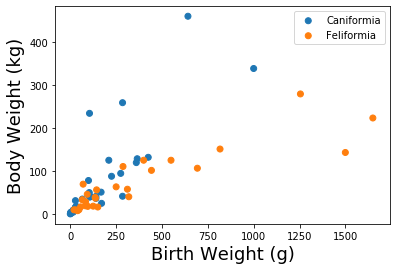

In [6]:
df['SuperFamily_col'] = bp.CatColors(df['SuperFamily'])
for name, gdf in df.groupby('SuperFamily'):
    bp.point(gdf['BW'], gdf['SB'], label=name, color=gdf['SuperFamily_col'])

bp.labels(y='Body Weight (kg)', x='Birth Weight (g)', size=18)
bp.legend()

If these data are truly a random sample (and we're to believe they are), then the proportions of the colors (not the numbers) depict a population parameter.  Here, $p$ might be the population proportion of animals from the order Carnivora that are in the Super Family Caniformia.  As we don't know what value $p$ takes on, we will estimate it with data.

As far as this class is concerned, estimating population parameters from data takes quite a bit of machinery.  The first necessary piece is the (assumed) functional form that represents a proportion.  A common choice for proportions is the Bernoulli distribution.  The Bernoulli distribution will provide us with a function, dependent on some unkown value $p$, from which we collect data and then manipulate to estimate $p$.

## Bernoulli Distribution

The probability density function of the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)

$$ f(x | p) = p^x (1 - p)^{1-x} $$

for $x \in \{0, 1\}$ and $p \in [0, 1]$.  Notice that $x$ only takes on a finite set of values.  When a random variable can take on only a countable number of values, it is called a discrete random variable.

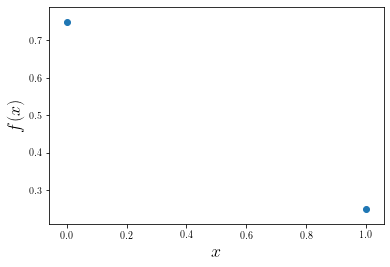

In [10]:
def bernoulli(x, p):
    return np.power(p, x) * np.power(1 - p, 1 - x)
x = np.asarray([0, 1])
p = 0.25

df = pd.DataFrame({'x': x, 'f': bernoulli(x, p)})

bp.point(df['x'], df['f'])
bp.LaTeX()
bp.labels(x='$x$', y='$f(x)$', size=18)

### Example

Since $x$ only ever takes on two values $0$ or $1$, this matches perfectly with our binary categorical variable `SuperFamily`.  The trick is, the levels of the variable `SuperFamily` will correspond to the values that the input $x$ of the Bernoulli random variable can take on, namely $0$ and $1$.  How we map from $\\{Canfiromia, Feliformia\\}$ to $\\{0, 1\\}$ is mathematically unimportant, but convention suggests that you are interested in one of the two levels more than the other.

Symbollically, we write $X_n \sim_{iid} \text{Bernoulli}(p)$ for $n = 1, \ldots, N$.  The random variables $X_n$ correspond to the sequence $0$s and $1$s that tell us which observations belong to the Super Family Caniformia.  The population parameter $p$ is unwknown, but can be estimated with the data $X_n$.  Notice that for Bernoulli data, the sample (because it's applied to data) mean returns a proportion since at most the sum of $N$ $1$s is $N$.

In [42]:
carnivora = pd.read_csv("~/data/carnivora.csv")
phat = np.round(np.mean(carnivora['SuperFamily'] == 'Caniformia'), 2)
phat

0.51

Much of this class involves interpretting statistics such as the one above.  We'd say based on our data, approximately $51$% of the animals in the Order Carnivora are in the Super Family Caniformia.

One the one hand, we need to recognize that this proportion is an estimate of the (population) parameter $p$ in the context of our study -- sampled animals, hopefully randomly, from the Super Families Caniformia and Feliformia within a specific geographic region.  On the other hand, since this is a random sample, there's some uncertainty to this estimate.

The remainder of this class will focus on two subtle points: how do we 

1. estimate parameters, and 
2. quantify the uncertainty in our estimates?

The answers (as far as this class is concerned) are the

1. likelihood, and
2. bootstrap

respectively.

## Likelihood

The likelihood function enables estimation of population parameters given a sample of data.  The likelihood function is not the only means for estimating population parameters, but it is the only method we will cover in this class.

### Definition

Given a random sample of independent and identically distributed data, $X_n \sim_{iid} F(\theta)$ for $n = 1, \ldots, N$, the likelihood function is 

$$ L(\theta | \mathbf{X}) = \prod_{n=1}^N f(x_n | \theta),$$

where $\mathbf{X}$ is just notation for our random sample of data, $\theta \in \mathbb{R}^d$ denotes the parameter(s) to be estimated, and $f(x\vert \theta)$ is the probability density function associated with the distribution $F$.  Given the likelihood function $L$, estimates are produced by finding the value of $\theta$ that maximizes the likelihood function.

### Maximum Likelihood Estimators

Assume we have data $X_n \sim_{iid} F(\theta)$.  The maximum likelihood estimator (MLE) of $\theta$ is

$$ \hat{\theta} = argmax_{\theta} L(\theta | \mathbf{X}).$$

### Finding MLEs

The definitions above are intimidating upon first site.  However, with a breif recap of some algebraic manipulations and a few tips on getting started, finding MLEs can often be reduced down to a rehearsal of maximization/minimization probelems of calculus 1.  Let's start with some quick exercises to refresh our minds of the algebra we'll need to find MLEs.

1. How can we rewrite (simplify?) the following equations?
    * $\log{(a \cdot b)}$?
    * $\log{(x_1 \cdot x_2)}$?
    * $\log{(x_1 \cdot x_2 \cdot \ldots \cdot x_n)}$?
    * $\log{(\prod_{i=1}^n x_i)}$?
    * $\log{(\prod_{i=1}^n f(x_i))}$?

2. How can we rewrite (simplify?) the following equations?
    * $\frac{d}{d \theta} \{a \cdot \theta + b \cdot \theta\}$?
    * $\frac{d}{d \theta} \{x_1 \cdot \theta + x_2 \cdot \theta\}$?
    * $\frac{d}{d \theta} \{x_1 \cdot \theta + \ldots + x_n \cdot \theta\}$?
    * $\frac{d}{d \theta} \{\sum_{i=1}^n x_i \cdot \theta \}$?

3. Evaluate the following expression,

$$ \frac{d}{d \theta} (x\cdot \log{(1-\theta))}.$$

Next, a hint for getting started on maximizing a function with nasty exponents.  It's immensely helpful (to both humans and computers) to work with the natural log of the likelihood function, cleverly named the log-likelihood function
 

$$ \ell (\theta|\mathbf{x}) = \log{L(\theta|\mathbf{x}) = \sum_{n=1}^N \log{f(x_n|\theta)}}. $$


### Example

Consider $X_n \sim_{iid} \text{Bernoulli}(p)$ for $n = 1, \ldots, N$.  Find the MLE of $p$ and call it $\hat{p}$.